In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import scipy.ndimage as ndi
plt.rcParams['figure.figsize'] = [10, 5]

In [5]:
x = np.float64(io.imread("test.jpg"))


In [64]:
def printIO(x,y, titlex="Input", titley="Output"):
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(x, clim=None, cmap="gray")
    plt.title(titlex)
    plt.subplot(1,2,2)
    plt.imshow(y, clim=None, cmap="gray")
    plt.title(titley)

In [7]:
# Devo dare l'immagine e la deviazione standard della gaussiana che desidero
# ed imposta anche la dimensione del filtro considerato


Text(0.5, 1.0, 'Immagine originale')

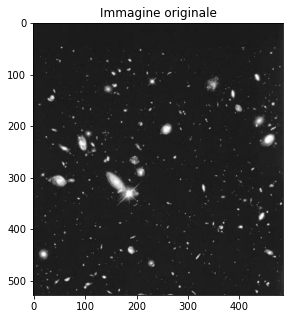

In [5]:
x = np.float64(io.imread("space.jpg"))

plt.figure()
plt.imshow(x, clim=[0,255], cmap="gray")
plt.title("Immagine originale")

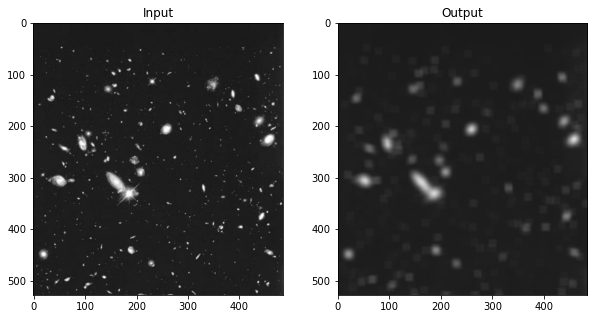

In [ ]:
# Ora voglio svolgere i seguenti passaggi
# Fare la media su una finestra 15x15
x = np.float64(io.imread("space.jpg"))
dim_mask = 15

mask = np.ones((dim_mask, dim_mask), dtype=np.float64)
mask = mask/(dim_mask**2)

y = ndi.correlate(x, mask, mode="reflect")

printIO(x,y)

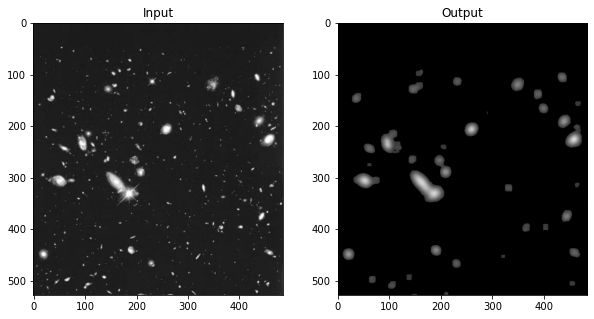

In [25]:
x = np.float64(io.imread("space.jpg"))
dim_mask = 15

mask = np.ones((dim_mask, dim_mask), dtype=np.float64)
mask = mask/(dim_mask**2)


y = ndi.correlate(x, mask, mode="reflect")

max = np.max(y)
soglia = max*0.25

z = np.copy(y)
z[z <= soglia] = 0

printIO(x,z)

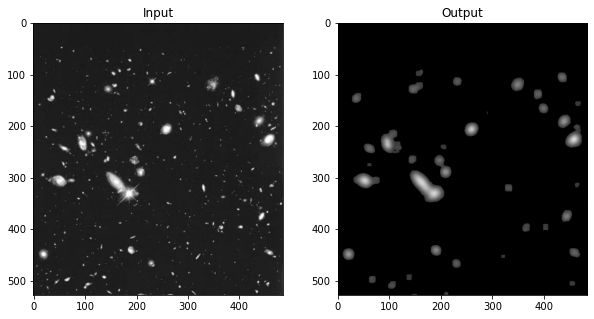

In [ ]:
# Soluzione del profettore
x = np.float64(io.imread("space.jpg"))
x_filt = ndi.uniform_filter(x, (15,15))
th = 0.25*np.max(x_filt)
mask = x_filt > th
y = mask*x

printIO(x,y)

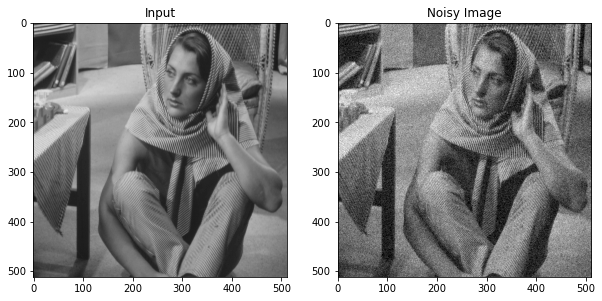

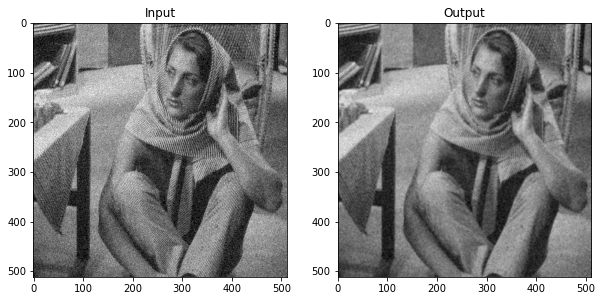

In [47]:
# Denoising
# Vado a generare prima dei valori in base ad una certa distribuzione di probabilità
x = np.float64(io.imread("barbara.gif"))
(M,N) = x.shape

# Valore che imposta la deviazione standars
d = 25

n = d*np.random.randn(M,N)

y = x + n

printIO(x, y, titley="Noisy Image")
k = 3
z = ndi.uniform_filter(y, (k,k))
printIO(y,z)

In [48]:
# Calcoliamo l'errore quadratico medio
mse = x - z
mse = mse**2

mse = np.mean(mse)

print(str(mse))

263.7012499757917


### Filtro spaziale adattivo

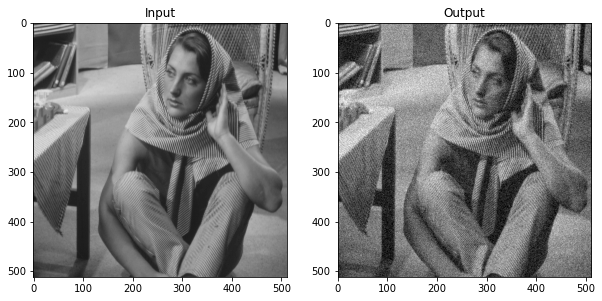

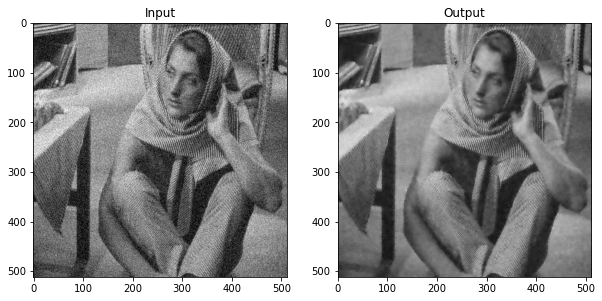

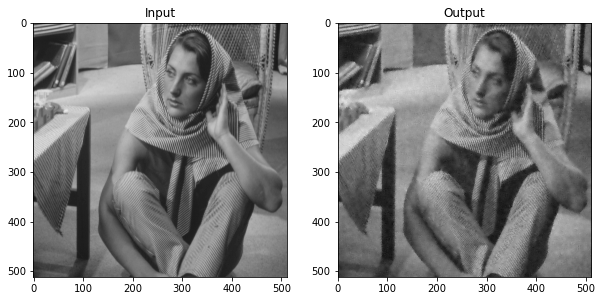

In [57]:
# Filtraggio spaziale adattivo
# modo per migliorare il filtro media aritmetica. La deviazione standard è una misura
# del contrasto che mi permette di capire se in un immagine c'è un bordo o meno
# Filtraggio del tipo:
# Se le varianze sono simili allora mi avvicino di più al caso della media.
# Altrimenti vado ad effettuare altre operazioni
x = np.float64(io.imread("barbara.gif"))
(M,N) = x.shape

# Valore che imposta la deviazione standard del rumore
# e lo va ad aggiungere al segnale originale
d = 25
n = d*np.random.randn(M,N)
y = x + n

# Grandezza della finestra scorrevole
k=7

# Calcolo la dev standard locale
var_loc = ndi.generic_filter(y, np.var, (k,k))

# Calcolo deviazione standard globale
var_glb = np.var(y)

# Media locale
avg_loc = ndi.generic_filter(y, np.mean, (k,k))

x_cap = y - (((d**2)/(var_loc))*(y - avg_loc))

printIO(x,y)
printIO(y,x_cap)
printIO(x, x_cap)

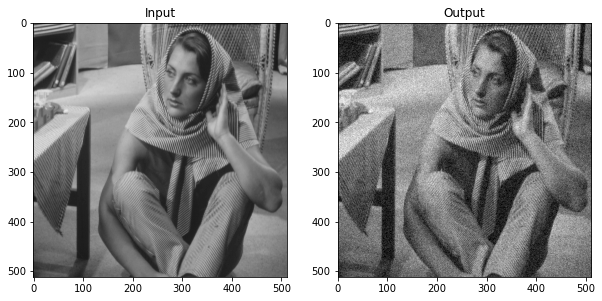

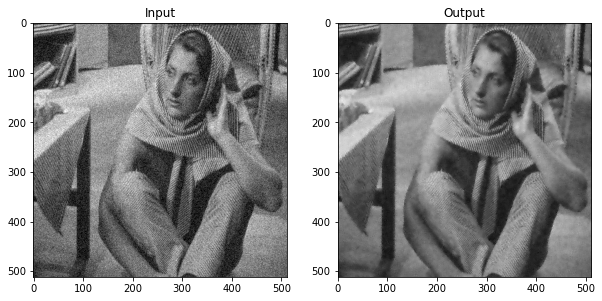

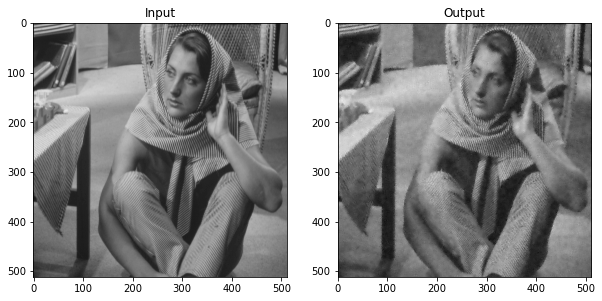

In [60]:
# Soluzione
x = np.float64(io.imread("barbara.gif"))
(M,N) = x.shape

# Valore che imposta la deviazione standard del rumore
# e lo va ad aggiungere al segnale originale
d = 25
n = d*np.random.randn(M,N)
y = x + n

# Grandezza della finestra scorrevole
k=7

var_loc = ndi.generic_filter(y, np.var, (k,k))
mean_loc = ndi.generic_filter(y, np.mean, (k,k))

x_cap = y - (d**2)*(y-mean_loc)/var_loc

printIO(x,y)
printIO(y,x_cap)
printIO(x, x_cap)

In [61]:
# Calcoliamo l'errore quadratico medio
mse = x - x_cap
mse = mse**2

mse = np.mean(mse)

print(str(mse))

169.7084670437795


## Filtri di sharpening

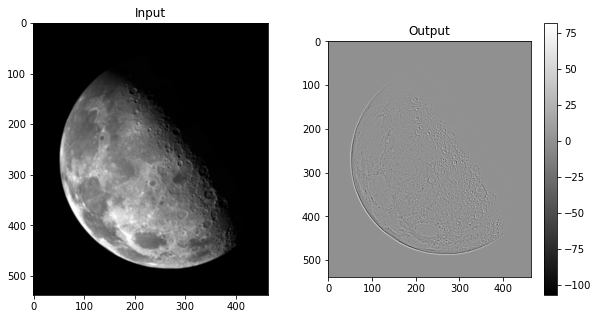

In [66]:
# Laplaciano sull'immagine
# sharpening -> si estraggono i dettagli ed i bordi da un immagine
x = np.float64(io.imread("luna.jpg"))

h = np.array([[0,1,0],[1,-4,1],[0,1,0]], dtype=np.float64)

y = ndi.correlate(x, h)

printIO(x,y)
plt.colorbar()

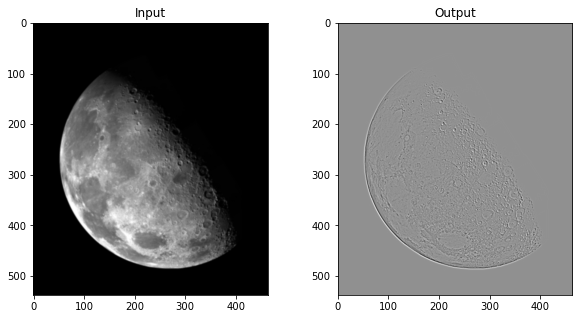

In [69]:
# Caso di utilizzo con convolute
y = ndi.convolve(x,h)

printIO(x, y)
# Non cambia niente poichè la matrice è simmetrica

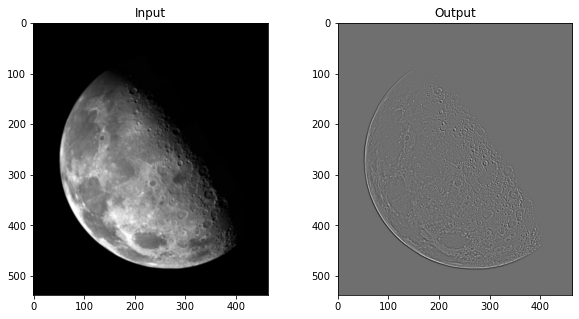

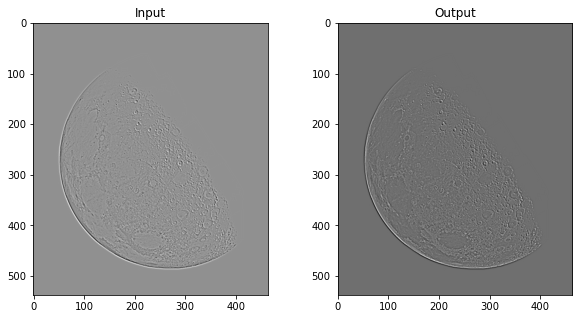

In [72]:
# Caso di matrice negativa
h_minus = -h

y_min = ndi.correlate(x, h_minus)

printIO(x,y_min)
printIO(y, y_min)

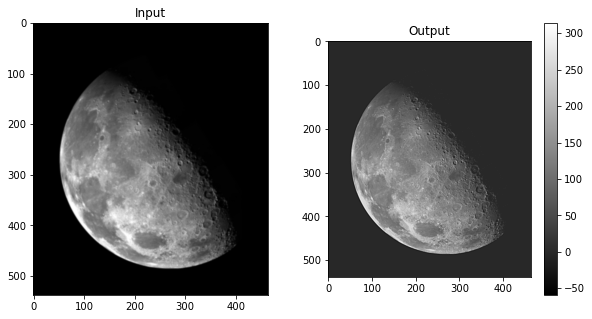

In [ ]:
z = x + y_min

printIO(x, z)

plt.colorbar()

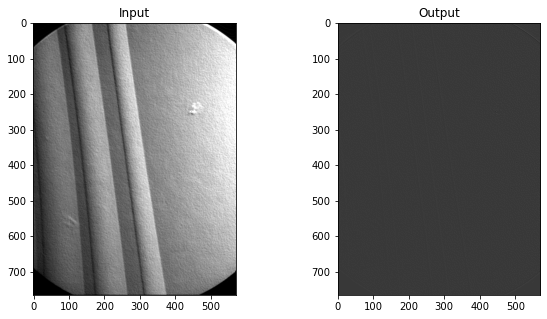

In [75]:
x = np.float64(io.imread("turbina.jpg"))

# Identificazione di punti isolati
h_linea = np.array([[-1, -1, -1], [2, 2, 2], [-1, -1, -1]], dtype=np.float64)

y = ndi.correlate(x, h)

printIO(x,y)

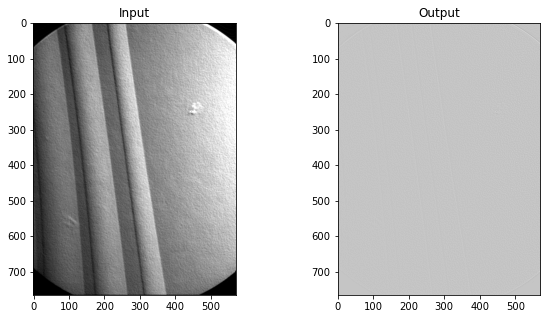

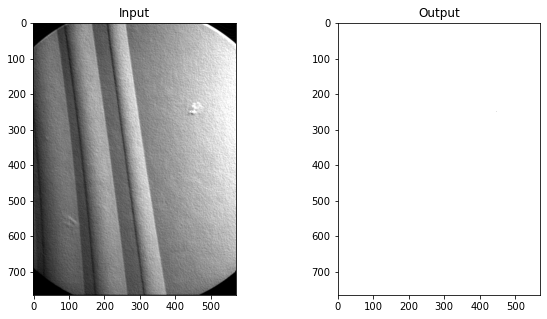

In [80]:
x = np.float64(io.imread("turbina.jpg"))
h_isolato = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]], dtype=np.float64)

y = ndi.correlate(x,h_isolato)

printIO(x,y)
# Ma non va bene, ho bisogno di considerare una soglia per avere una maschera binaria
y = np.abs(y)

max_y = np.max(y)
soglia = max_y*0.90
mask = y>soglia
mask = 1-mask
printIO(x,mask)

In [90]:
def sistema(y):
    max_y = np.max(y)
    soglia = max_y*0.90
    mask = y>soglia
    return mask

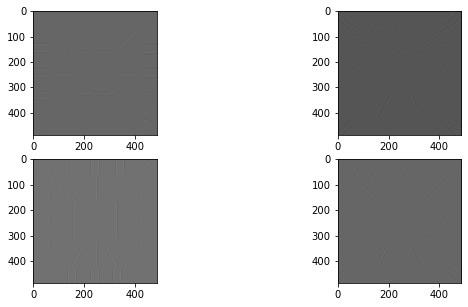

In [ ]:
x = np.float64(io.imread("quadrato.jpg"))

plt.figure()
plt.imshow(x, clim=None, cmap="gray")

h_linea = np.array([[-1, -1, -1], [2, 2, 2], [-1,-1,-1]], dtype=np.float64)
h_diagonale = np.array([[2, -1, -1], [-1, 2, -1], [-1,-1, 2]], dtype=np.float64)
h_vert = np.array([[-1, 2, -1], [-1, 2, -1], [-1,2,-1]], dtype=np.float64)
h_diag_co = np.array([[-1, -1, 2], [-1, 2, -1], [2,-1,-1]], dtype=np.float64)

y_linea = ndi.correlate(x, h_linea)
y_diagonale = ndi.correlate(x, h_diagonale)
y_vert = ndi.correlate(x, h_vert)
y_diag_co = ndi.correlate(x, h_diag_co)

mask_linea = sistema(y_linea)
mask_diagonale = sistema(y_diagonale)
mask_vert = sistema(y_vert)
mask_diag_co = sistema(y_diag_co)

plt.figure()
plt.subplot(2,2,1)
plt.imshow(y_linea, clim=None, cmap="gray")
plt.subplot(2,2,2)
plt.imshow(y_diagonale, clim=None, cmap="gray")
plt.subplot(2,2,3)
plt.imshow(y_vert, clim=None, cmap="gray")
plt.subplot(2,2,4)
plt.imshow(y_diag_co, clim=None, cmap="gray")


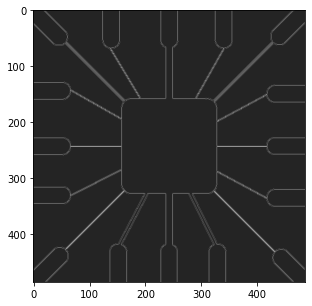

In [95]:
z = np.stack((y_linea, y_diag_co, y_diagonale,y_vert), -1)
z = np.max(z, -1)

plt.figure()
plt.imshow(z, clim=None, cmap="gray")